# Test run of the exported model created with Transfer Learning

In [6]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import platform
import pathlib

# This project ran with Python 3.7.9, Tensorflow 2.10.1, Keras 2.10.0
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.9
Tensorflow version: 2.10.1
Keras version: 2.10.0


## Load the new model

In [7]:
model = tf.keras.models.load_model('image_classification_mobilenet_v2.h5')

In [8]:
TEST_IMAGE_PATHS = 'kaggle_dataset/vehicle/test/testset'
TEST_IMAGE_PATHS

'kaggle_dataset/vehicle/test/testset'

In [9]:
IMAGE_SIZE = 224

## Load images from test set

In [10]:
test_set = tf.keras.utils.image_dataset_from_directory(
    TEST_IMAGE_PATHS,
    labels=None,
    shuffle=False,
    batch_size = None,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
)

Found 7958 files belonging to 1 classes.


In [11]:
print(test_set)

<PrefetchDataset element_spec=TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None)>


In [12]:
def display_image(image_np, title=None):
    plt.figure()
    plt.title(str(title) if title else None)
    plt.imshow(image_np)

In [13]:
# Combine tags in the format "Label1 (probability1), Label2 (probability2), ..."
def combine_tags(probs):
    probs *= 100
    sorted_indices = sorted(range(len(labels)), key= lambda i: -probs[i])
    sorted_indices = sorted_indices[:3]
    return ''.join(f'{labels[i]} ({probs[i]:.2f}%), ' for i in sorted_indices)

In [14]:
labels = ["Ambulance", "Boat", "Cart", "Limousine", "Snowmobile", "Truck", "Barge", "Bus", 
          "Caterpillar", "Motorcycle", "Tank", "Van", "Bicycle", "Car", "Helicopter", "Segway", "Taxi"]

## Run the model on 10 images

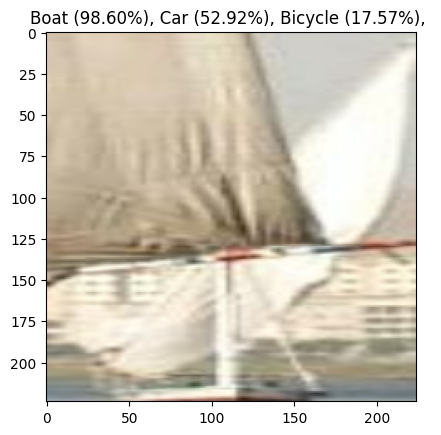

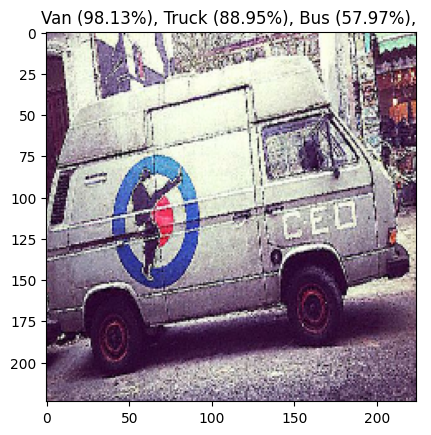

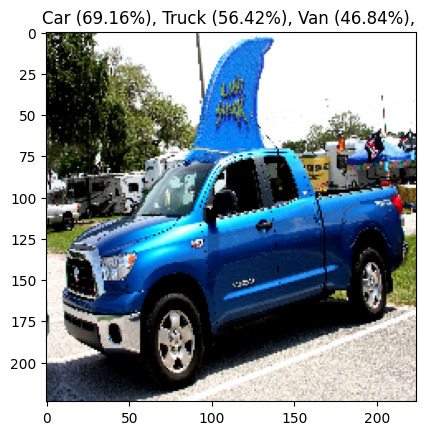

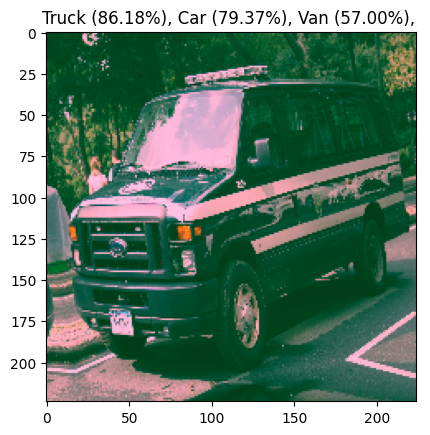

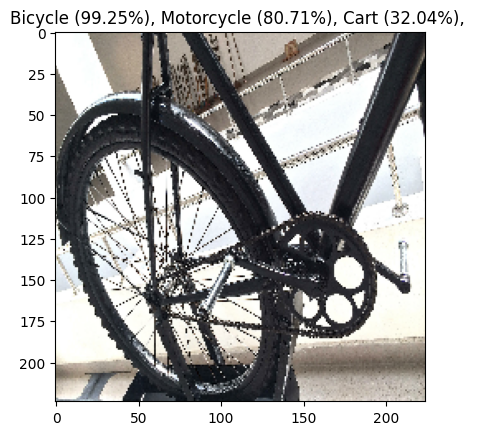

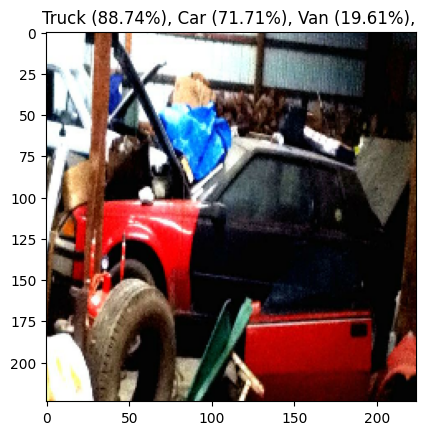

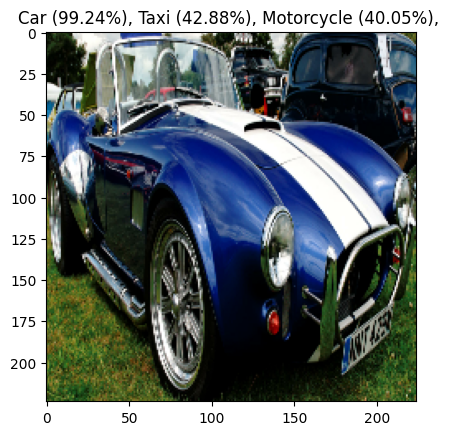

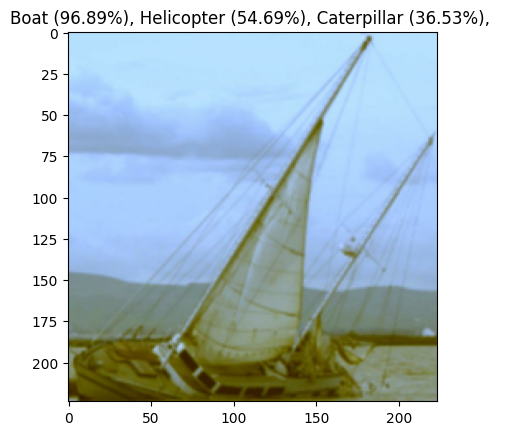

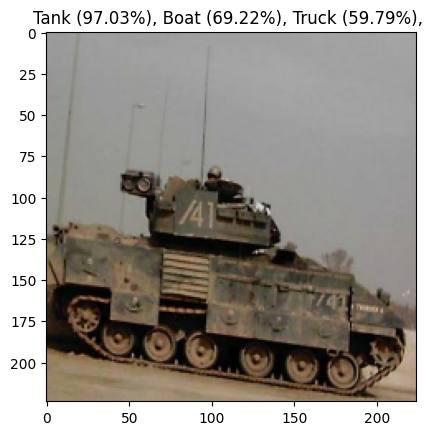

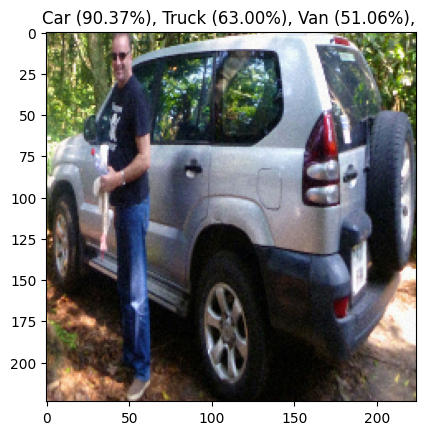

In [15]:
for image in test_set.take(10):
    probabilities = model(image[tf.newaxis, :])
    probabilities = probabilities[0]
    tags = combine_tags(probabilities)
    display_image(image.numpy().astype('uint8'), tags)

In [16]:
CUSTOM_IMAGES_PATH = 'custom_images'

## Load custom images to try with the model

In [17]:
custom_images = tf.keras.utils.image_dataset_from_directory(
    CUSTOM_IMAGES_PATH,
    labels=None,
    shuffle=False,
    batch_size = None,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
)

Found 5 files belonging to 1 classes.


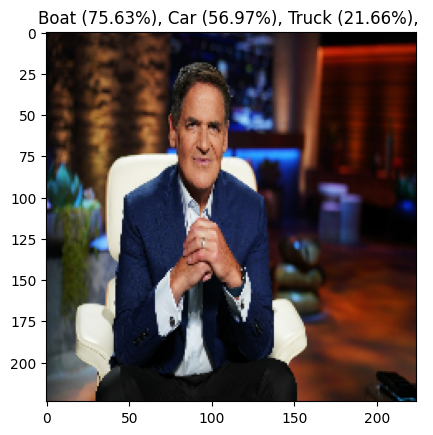

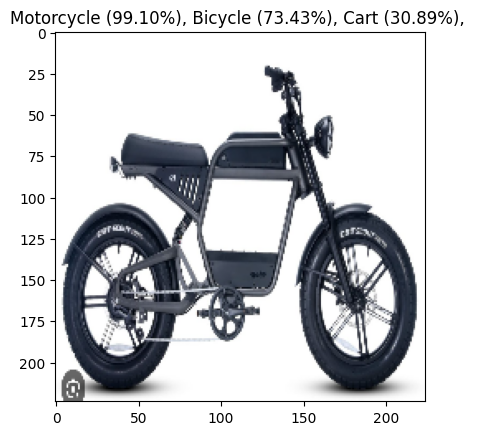

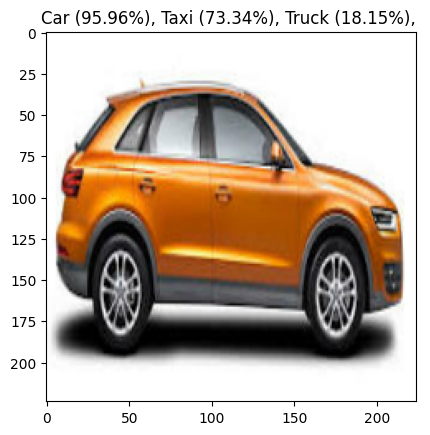

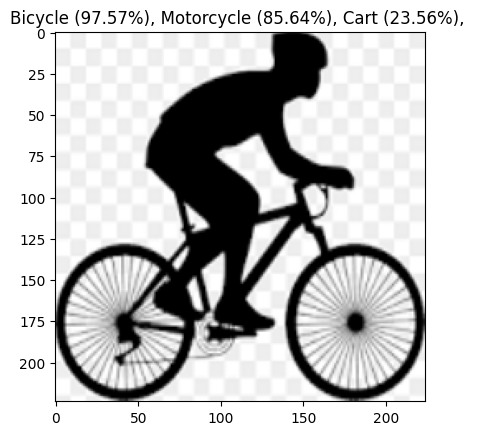

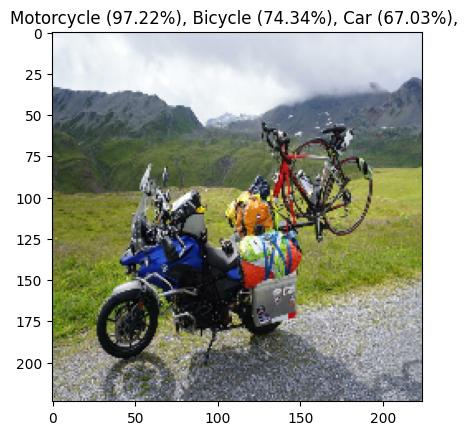

In [18]:
for i, image in enumerate(custom_images):
    result = model(image[tf.newaxis, :])
    result = result[0]
    tags = combine_tags(result)
    display_image(image.numpy().astype('uint8'), tags)